<a href="https://colab.research.google.com/github/gabmachado97/codes-axe/blob/master/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importação



In [ ]:
!pip install susi

  Created wheel for susi: filename=susi-1.1.0-cp36-none-any.whl size=23218 sha256=a6c9426f208153be64a7de5c6d785d43acc28078b3d71c483378ee046bde2688
  Stored in directory: /root/.cache/pip/wheels/60/f3/18/ef12eb1fc8477e8d090d12c33923abeb30e9ef69ee3126c5fe
Successfully built susi


In [ ]:
import pandas as pd

import susi
from susi.SOMPlots import plot_umatrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


## 2. Dataset

### 2.1 Overview

In [ ]:
path_bd = '/content/drive/My Drive/Colab Notebooks/SOM/HDI.csv'

In [ ]:
bd = pd.read_csv(path_bd)
bd

,Unnamed: 0,Id,Country,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,Average annual HDI growth 1990-2000,Average annual HDI growth 2000-2010,Average annual HDI growth 2010-2015,Average annual HDI growth 1990-2015,Gender Development Index value,Gender Development Index Group,Human Development Index (HDI) Female,Human Development Index (HDI) Male,Life expectancy at birth Female,Life expectancy at birth Male,Mean years of schooling Female,Mean years of schooling Male,Estimated gross national income per capita Female,Estimated gross national income per capita Male,Share of seats in parliament (% held by women),Population with at least some secondary education % (2005-2015) Female,Population with at least some secondary education % (2005-2015) Male,Labour force participation rate (% ages 15 and older) Female,Total Population (millions) 2015,Total Population (millions) 2030,Population Average annual growth 2000/2005 (%),Population Average annual growth 2010/2015 (%),Population Urban 2015 %,Population Under age 5 (millions) 2015,Population Ages 15–64 (millions) 2015,Population Ages 65 and older (millions) 2015,Population Median age (years) 2015,Dependency Ration Young age (0–14) /(per 100 people ages 15–64),Dependency Ratio Old age (65 and older) /(per 100 people ages 15–64),Total fertility rate (birth per woman) 2000/2005,...,Infants lacking immunization DTP (% of one-year-olds),Infants lacking immunization Measles (% of one-year-olds),Child malnutrition Stunting (moderate or severe) 2010-2015,"Mortality rates Infant (per 1,000 live births) 2015","Mortality rates Under-five (per 1,000 live births) 2015","Mortality rates Female Adult (per 1,000 live births) 2014","Mortality rates Male Adult (per 1,000 live births) 2014","Deaths due to Malria (per 100,000 people)","Deaths due to Tuberculosis (per 100,000 people)","HIV prevalence, adult (% ages 15–49)",Life expectancy at age 59 (years) 2010/2015,"Physicians (per 10,000 people) 2001-2014",Public health expenditure (% of GDP) 2014,Employment to population ratio (% ages 15 and older),Labour force participation rate (% ages 15 and older),Employment in agriculture (% of total employment) 2010-2014,Employment in services (% of total employment) 2010- 2014,Total Unemployment (% of labour force) 2015,Unemployment Youth (% ages 15-24) 2010-2014,Unemployment Youth not in school or employment (% ages 15-24) 2010-2014,Vulnerable employment (% of total employment) 2005-2014,Child labour (% ages 5-14) 2009-2015,Working poor at PPP$3.10 a day (%) 2004-2013,Mandatory paid maternity leave (days),Old-age pension recipients (% of statutory pension age population) 2004-2013,Internet users,Internet users (% 2010 -2015),Inequality-adjusted HDI (IHDI),Inequality-adjusted HDI (IHDI) Over loss(%),Difference from HDI rank,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
0,0,1,Norway,1.0,0.949,81.7,12.7,67614.0,5.0,0.0,0.77,0.24,0.21,0.45,0.993,1.0,0.944,0.951,83.7,79.7,12.8,12.7,59800.0,75314.0,39.6,96.1,94.6,61.2,5.200000,5.900000,0.6,1.3,80.5,0.3,3.400000,0.9,39.1,27.3,24.9,1.8,...,1.0,6.0,NaN,2.0,2.6,44.0,69.0,NaN,0.2,NaN,23.9,42.8,8.3,62.2,64.9,2.1,77.0,4.1,10.1,5.5,5.3,NaN,NaN,NaN,100.0,96.8,-0.800000,0.898,5.4,0.0,5.4,3.3,0.918,2.4,0.894,10.4,0.882,3.8,0.9,25.9
1,1,2,Australia,2.0,0.939,82.5,13.2,42822.0,19.0,1.0,0.38,0.31,0.24,0.32,0.978,1.0,0.927,0.948,84.6,80.5,13.4,13.0,34271.0,51386.0,30.5,91.4,91.5,58.6,24.000000,28.500000,1.2,1.6,89.4,1.5,15.900000,3.6,37.5,28.2,22.7,1.8,...,8.0,7.0,2.0,3.0,3.8,NaN,NaN,NaN,0.2,0.2,24.9,32.7,6.3,60.7,64.7,2.6,69.5,6.3,13.5,9.8,NaN,NaN,NaN,N

### 2.2 Dados Faltantes

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(bd.isna().sum(axis=1))
    list_of_nan = bd.isna().sum(axis=1)

0       7
1       8
2       8
3       7
4       8
5      17
6       8
7       8
8       6
9      10
10      7
11     25
12     18
13      7
14     62
15      6
16      8
17      8
18      9
19      8
20      6
21      8
22      8
23      6
24      8
25      7
26      7
27      5
28      5
29     19
30      8
31     52
32      6
33      9
34     17
35      8
36      6
37      3
38     17
39      8
40      8
41     20
42      8
43      5
44      1
45      5
46     16
47      7
48      7
49      3
50     16
51      4
52     19
53     13
54      2
55      7
56      2
57     24
58     13
59     51
60      0
61     40
62     31
63      4
64      7
65      0
66      2
67     15
68      0
69      5
70      1
71      0
72      0
73     54
74      4
75     11
76      1
77      3
78      0
79     38
80      8
81      5
82     12
83      1
84      1
85      5
86      1
87      0
88      0
89     10
90     10
91      1
92     13
93      4
94      0
95     53
96      9
97      1
98      0
99     30


Serão descartados países com **17** ou mais dados faltantes, sendo as seguintes Linhas:\
5
11
12
14
29
31
34
38
41
52
57
58
59
61
62
73
79
95
99
101
103
111
127
135
136
144
178
181
188
189
190
191
192
193
194

In [ ]:
for idx, qtd in enumerate(list_of_nan):
  if qtd>=17:
    bd.drop([idx],axis=0,inplace=True)
bd

,Unnamed: 0,Id,Country,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,Average annual HDI growth 1990-2000,Average annual HDI growth 2000-2010,Average annual HDI growth 2010-2015,Average annual HDI growth 1990-2015,Gender Development Index value,Gender Development Index Group,Human Development Index (HDI) Female,Human Development Index (HDI) Male,Life expectancy at birth Female,Life expectancy at birth Male,Mean years of schooling Female,Mean years of schooling Male,Estimated gross national income per capita Female,Estimated gross national income per capita Male,Share of seats in parliament (% held by women),Population with at least some secondary education % (2005-2015) Female,Population with at least some secondary education % (2005-2015) Male,Labour force participation rate (% ages 15 and older) Female,Total Population (millions) 2015,Total Population (millions) 2030,Population Average annual growth 2000/2005 (%),Population Average annual growth 2010/2015 (%),Population Urban 2015 %,Population Under age 5 (millions) 2015,Population Ages 15–64 (millions) 2015,Population Ages 65 and older (millions) 2015,Population Median age (years) 2015,Dependency Ration Young age (0–14) /(per 100 people ages 15–64),Dependency Ratio Old age (65 and older) /(per 100 people ages 15–64),Total fertility rate (birth per woman) 2000/2005,...,Infants lacking immunization DTP (% of one-year-olds),Infants lacking immunization Measles (% of one-year-olds),Child malnutrition Stunting (moderate or severe) 2010-2015,"Mortality rates Infant (per 1,000 live births) 2015","Mortality rates Under-five (per 1,000 live births) 2015","Mortality rates Female Adult (per 1,000 live births) 2014","Mortality rates Male Adult (per 1,000 live births) 2014","Deaths due to Malria (per 100,000 people)","Deaths due to Tuberculosis (per 100,000 people)","HIV prevalence, adult (% ages 15–49)",Life expectancy at age 59 (years) 2010/2015,"Physicians (per 10,000 people) 2001-2014",Public health expenditure (% of GDP) 2014,Employment to population ratio (% ages 15 and older),Labour force participation rate (% ages 15 and older),Employment in agriculture (% of total employment) 2010-2014,Employment in services (% of total employment) 2010- 2014,Total Unemployment (% of labour force) 2015,Unemployment Youth (% ages 15-24) 2010-2014,Unemployment Youth not in school or employment (% ages 15-24) 2010-2014,Vulnerable employment (% of total employment) 2005-2014,Child labour (% ages 5-14) 2009-2015,Working poor at PPP$3.10 a day (%) 2004-2013,Mandatory paid maternity leave (days),Old-age pension recipients (% of statutory pension age population) 2004-2013,Internet users,Internet users (% 2010 -2015),Inequality-adjusted HDI (IHDI),Inequality-adjusted HDI (IHDI) Over loss(%),Difference from HDI rank,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
0,0,1,Norway,1.0,0.949,81.7,12.7,67614.0,5.0,0.0,0.77,0.24,0.21,0.45,0.993,1.0,0.944,0.951,83.7,79.7,12.8,12.7,59800.0,75314.0,39.6,96.1,94.6,61.2,5.200000,5.900000,0.6,1.3,80.5,0.3,3.400000,0.9,39.1,27.3,24.9,1.8,...,1.0,6.0,NaN,2.0,2.6,44.0,69.0,NaN,0.2,NaN,23.9,42.8,8.3,62.2,64.9,2.1,77.0,4.1,10.1,5.5,5.3,NaN,NaN,NaN,100.0,96.8,-0.800000,0.898,5.4,0.0,5.4,3.3,0.918,2.4,0.894,10.4,0.882,3.8,0.9,25.9
1,1,2,Australia,2.0,0.939,82.5,13.2,42822.0,19.0,1.0,0.38,0.31,0.24,0.32,0.978,1.0,0.927,0.948,84.6,80.5,13.4,13.0,34271.0,51386.0,30.5,91.4,91.5,58.6,24.000000,28.500000,1.2,1.6,89.4,1.5,15.900000,3.6,37.5,28.2,22.7,1.8,...,8.0,7.0,2.0,3.0,3.8,NaN,NaN,NaN,0.2,0.2,24.9,32.7,6.3,60.7,64.7,2.6,69.5,6.3,13.5,9.8,NaN,NaN,NaN,N

Preenche os dados faltantes com a média da respectiva coluna

In [ ]:
list_of_col_nan = bd.isna().sum(axis=0)
columns = list(bd.columns)
for idx, qtd in enumerate(list_of_col_nan):
  if qtd>0:
    bd[columns[idx]].fillna(bd[columns[idx]].mean(),inplace=True)
bd

,Unnamed: 0,Id,Country,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,Average annual HDI growth 1990-2000,Average annual HDI growth 2000-2010,Average annual HDI growth 2010-2015,Average annual HDI growth 1990-2015,Gender Development Index value,Gender Development Index Group,Human Development Index (HDI) Female,Human Development Index (HDI) Male,Life expectancy at birth Female,Life expectancy at birth Male,Mean years of schooling Female,Mean years of schooling Male,Estimated gross national income per capita Female,Estimated gross national income per capita Male,Share of seats in parliament (% held by women),Population with at least some secondary education % (2005-2015) Female,Population with at least some secondary education % (2005-2015) Male,Labour force participation rate (% ages 15 and older) Female,Total Population (millions) 2015,Total Population (millions) 2030,Population Average annual growth 2000/2005 (%),Population Average annual growth 2010/2015 (%),Population Urban 2015 %,Population Under age 5 (millions) 2015,Population Ages 15–64 (millions) 2015,Population Ages 65 and older (millions) 2015,Population Median age (years) 2015,Dependency Ration Young age (0–14) /(per 100 people ages 15–64),Dependency Ratio Old age (65 and older) /(per 100 people ages 15–64),Total fertility rate (birth per woman) 2000/2005,...,Infants lacking immunization DTP (% of one-year-olds),Infants lacking immunization Measles (% of one-year-olds),Child malnutrition Stunting (moderate or severe) 2010-2015,"Mortality rates Infant (per 1,000 live births) 2015","Mortality rates Under-five (per 1,000 live births) 2015","Mortality rates Female Adult (per 1,000 live births) 2014","Mortality rates Male Adult (per 1,000 live births) 2014","Deaths due to Malria (per 100,000 people)","Deaths due to Tuberculosis (per 100,000 people)","HIV prevalence, adult (% ages 15–49)",Life expectancy at age 59 (years) 2010/2015,"Physicians (per 10,000 people) 2001-2014",Public health expenditure (% of GDP) 2014,Employment to population ratio (% ages 15 and older),Labour force participation rate (% ages 15 and older),Employment in agriculture (% of total employment) 2010-2014,Employment in services (% of total employment) 2010- 2014,Total Unemployment (% of labour force) 2015,Unemployment Youth (% ages 15-24) 2010-2014,Unemployment Youth not in school or employment (% ages 15-24) 2010-2014,Vulnerable employment (% of total employment) 2005-2014,Child labour (% ages 5-14) 2009-2015,Working poor at PPP$3.10 a day (%) 2004-2013,Mandatory paid maternity leave (days),Old-age pension recipients (% of statutory pension age population) 2004-2013,Internet users,Internet users (% 2010 -2015),Inequality-adjusted HDI (IHDI),Inequality-adjusted HDI (IHDI) Over loss(%),Difference from HDI rank,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
0,0,1,Norway,1.0,0.949,81.7,12.7,67614.0,5.0,0.0,0.770000,0.240000,0.21,0.450000,0.993,1.0,0.944,0.951,83.7,79.7,12.8,12.7,59800.0,75314.0,39.6,96.1,94.6,61.2,5.200000,5.900000,0.6,1.3,80.5,0.3,3.400000,0.9,39.1,27.3,24.9,1.8,...,1.0,6.0,22.091406,2.0,2.6,44.000000,69.000000,32.88427,0.2,2.469,23.9,42.8,8.3,62.2,64.9,2.10000,77.000000,4.1,10.1,5.500000,5.300000,15.418182,35.572897,106.096774,100.000000,96.8,-0.800000,0.898,5.4,0.0,5.4,3.3,0.918,2.4,0.894,10.4,0.882,3.8,0.9,25.9
1,1,2,Australia,2.0,0.939,82.5,13.2,42822.0,19.0,1.0,0.380000,0.310000,0.24,0.320000,0.978,1.0,0.927,0.948,84.6,80.5,13.4,13.0,34271.0,51386.0,30.5,91.4,91.5,58.6,24.000000,28.500000,1.2,1.6,89.4,1.5,15.900000,3.6,37.5,28.2,22.7,1.8,...,8.0,7.0,2

## 3. SOM


In [ ]:
input_bd = bd.drop(['Unnamed: 0', 'Id', 'Country', 'HDI Rank'], axis=1)
y = bd['Id'].to_numpy()
input = input_bd.to_numpy()
input.shape

(161, 78)

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
input = sc.fit_transform(input)

### 3.1 Experimento 1

In [ ]:
som = susi.SOMClustering(
    n_rows=50,
    n_columns=50
)

som.fit(input)
print("SOM fitted!")

SOM fitted!


#### Gráficos

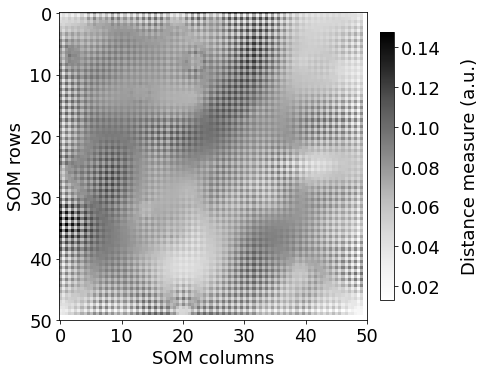

In [ ]:
u_matrix = som.get_u_matrix()
plot_umatrix(u_matrix, 50, 50)
plt.show()

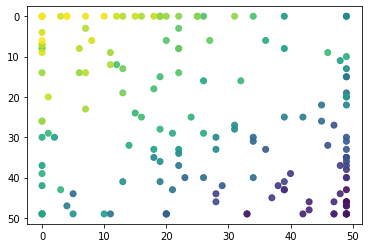

In [ ]:
clusters = som.get_clusters(input)
plotScatter = plt.scatter(x=[c[1] for c in clusters], y=[c[0] for c in clusters], c=y, alpha=0.9)
plt.gca().invert_yaxis()
plt.show()

### 3.2 Experimento 2

In [ ]:
som2 = susi.SOMClustering(
    n_rows=50,
    n_columns=50,
    learning_rate_start = 0.05
)

som2.fit(input)
print("SOM fitted!")

SOM fitted!


#### Gráficos

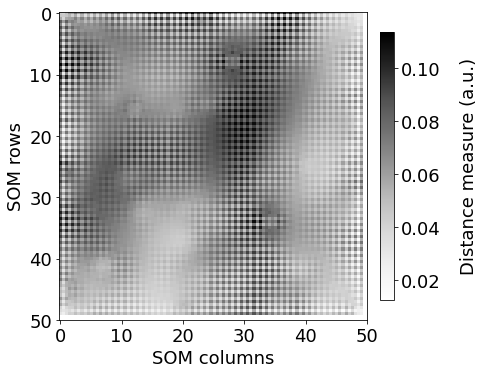

In [ ]:
u_matrix = som2.get_u_matrix()
plot_umatrix(u_matrix, 50, 50)
plt.show()

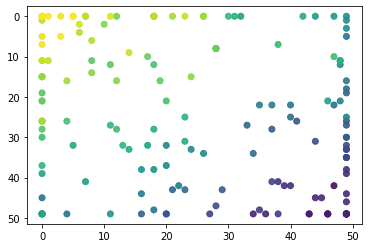

In [ ]:
clusters = som2.get_clusters(input)
plotScatter = plt.scatter(x=[c[1] for c in clusters], y=[c[0] for c in clusters], c=y, alpha=0.9)
plt.gca().invert_yaxis()
plt.show()

### 3.3 Experimento 3

In [ ]:
som3 = susi.SOMClustering(
    n_rows=50,
    n_columns=50,
    learning_rate_start = 0.05,
    n_iter_unsupervised = 2000
)

som3.fit(input)
print("SOM fitted!")

SOM fitted!


#### Gráficos

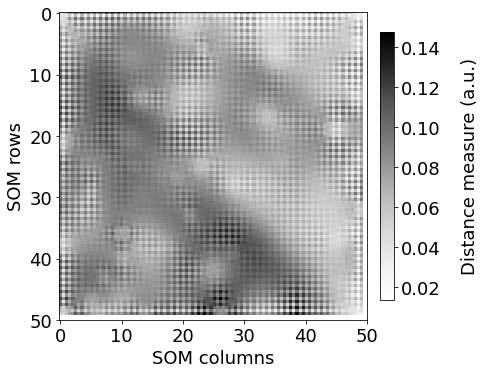

In [ ]:
u_matrix = som3.get_u_matrix()
plot_umatrix(u_matrix, 50, 50)
plt.show()

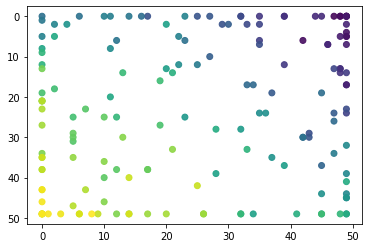

In [ ]:
clusters = som3.get_clusters(input)
plotScatter = plt.scatter(x=[c[1] for c in clusters], y=[c[0] for c in clusters], c=y, alpha=0.9)
plt.gca().invert_yaxis()
plt.show()

### 3.4 Experimento 4

In [ ]:
som4 = susi.SOMClustering(
    n_rows=50,
    n_columns=50,
    learning_rate_start = 0.01,
    n_iter_unsupervised = 3000
)

som4.fit(input)
print("SOM fitted!")

SOM fitted!


#### Gráficos

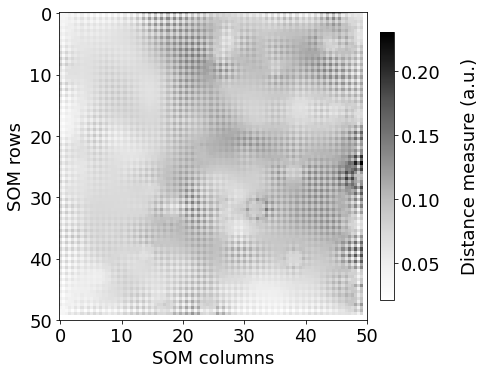

In [ ]:
u_matrix = som4.get_u_matrix()
plot_umatrix(u_matrix, 50, 50)
plt.show()

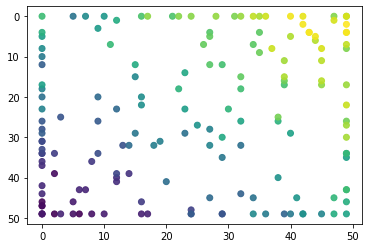

In [ ]:
clusters = som4.get_clusters(input)
plotScatter = plt.scatter(x=[c[1] for c in clusters], y=[c[0] for c in clusters], c=y, alpha=0.9)
plt.gca().invert_yaxis()
plt.show()